In [1]:
from parseMD import Universe,Atom,compute_frame_from_atom,_prepared
from universe import *
import pandas as pd

In [2]:
from dynpy_params import ParseDynamics as PD

In [3]:
atom = pd.read_csv("./example-data/tinker/methane/methane-01-atom-table.csv")

In [10]:
200*(12.01+4*1.01)*1.66054e-24

5.3303334e-21

In [11]:
(5.3303334e-21/0.372)**(1/3)

2.428867430793715e-07

In [12]:
2.428867430793715e-07/5.2918e-9

45.89870045719254

In [5]:
atom

,symbol,x,y,z,frame,label
0,C,-3.556968,-8.061886,6.165256,0,0
1,H,-4.511229,-8.595516,6.119711,0,1
2,H,-3.448460,-7.633003,7.155727,0,2
3,H,-3.569865,-7.260471,5.437326,0,3
4,H,-2.723656,-8.725811,5.940475,0,4
...,...,...,...,...,...,...
2221738,H,16.247284,-25.467114,-1.570256,2221,738
2221739,H,15.190435,-25.458298,-3.008735,2221,739
2221740,C,14.027506,-13.477745,6.078864,2221,740
2221741,H,13.356105,-13.304959,5.299307,2221,741


In [4]:
u,vel = _prepared(atom,timestep=0.01,start_prod=0,celldm=45.9)

MemoryError: Allocation failed (probably too large).

In [ ]:
from SRparse import *

In [ ]:
#import dynpy_params as params
class ParseDynamics:
     MD_ENGINE = 'Tinker'
     #traj_dir = './example-data/tinker/water/vapor/101kpa/' #Path to directory containing trajectory directories {01..XX} ('./example-data/' for example, or './trajectories/' for default space of your own traj data)
     #traj_dir = './example-data/tinker/water/' #Path to directory containing trajectory directories {01..XX} ('./example-data/' for example, or './trajectories/' for default space of your own traj data)
     #ntraj = 1 #number of trajectories to parse
     #nat = 384
     #start_prod = 0 #MD step number to start sampling snapshots from. For the default setup and equilibration used in this package, 42000 (~6ps) is recommended
     #end_prod = 100
     #md_print_freq = 1
     #sample_freq = 1 #number of steps between sampled snapshots. Keep high for testing
     #celldm = 216.86/0.529177 #Simulation cell dimension in bohr. May be any expression returning floating point value
     #celldm = 16.22/0.529177 #Simulation cell dimension in bohr. May be any expression returning floating point value
     #nmol = 1
     timestep = 0.01 #timestep of MD in picoseconds. May be any expression returning floating point value
     #parse_vel=False

class SpinRotation:
    mol_type = 'methane'
    nmol = 1
    C_SR = [0.48,0.48,15.95]
    
class Snapshots:  #Input parameters file for neighbors.py. Used for parsing qe aiMD, making clusters, and writing inputs for ADF/QE-GIPAW
    write_ADF = True #If True, write input files for ADF EFG calcs
    write_GIPAW = False #If True, write input files for QE-PAW EFG calcs
    analyte_label = 'I' #Element symbol for analyte nucleus. Should be redundant with nuc_symbol and if not provided will be inferred from the latter
    nuc_symbol = '127I' #Analyte symbol prepended with the proper atomic mass number of the isotope
    solute_charge = -1 #Charge of the solute/analyte
    formal_charges = {'H':1,'O':-2}
    write_xyzs = True #If True, write set of xyz files of clusters used for ADF inputs
    nn = 30 #Number of nearest neighbor solvent molecules desired for clusters
    scratch = '/gpfs/scratch' #Scratch space to use for EFG calculations
    skip_compute_neighbors = False #If True, write new ADF inputs from existing xyz data from previous run. Use only if .xyz files exist and you know they are computed correctly

In [ ]:
SR_module_main(ParseDynamics,SpinRotation)

In [63]:
vel = pd.read_csv("./vel.csv")
#atom = pd.read_csv("./atom.csv")
vel

,Unnamed: 0,symbol,x,y,z,frame
0,0,O,0.343552D+01,0.164631D+01,-0.895100D+00,0
1,1,H,-0.694970D+01,0.207495D+02,-0.678917D-01,0
2,2,H,-0.531751D+02,0.185476D+02,0.242310D+02,0
3,3,O,0.285894D+01,0.646562D+01,0.326353D+01,0
4,4,H,0.198045D+02,0.911515D+01,0.229146D+01,0
...,...,...,...,...,...,...
6595,6595,H,0.169173D+02,0.716370D+01,0.290746D+02,10
6596,6596,H,-0.140890D+02,0.135674D+02,0.297809D+01,10
6597,6597,O,0.294320D+01,0.383972D+00,-0.397763D+01,10
6598,6598,H,-0.274846D+01,-0.822809D+01,0.125772D+02,10


In [17]:
from SRrax import correlate

In [19]:
J.groupby('molecule_label').apply(correlate,columns_in=['x','y','z'],columns_out=['$J_{x}$','$J_{y}$','$J_{z}$'],pass_columns=['frame','molecule_label','molecule'])

C:\Users\Adam\AppData\Local\Temp\ipykernel_8480\2107077702.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  J.groupby('molecule_label').apply(correlate,columns_in=['x','y','z'],columns_out=['$J_{x}$','$J_{y}$','$J_{z}$'],pass_columns=['frame','molecule_label','molecule'])


,$J_{x}$,$J_{y}$,$J_{z}$,frame,molecule_label,molecule
0,NaN,NaN,NaN,30000,1,0
1,NaN,NaN,NaN,30000,2,1
2,NaN,NaN,NaN,30010,1,61
3,NaN,NaN,NaN,30010,2,62
4,NaN,NaN,NaN,30020,1,123
...,...,...,...,...,...,...
397,NaN,NaN,NaN,31980,2,12038
398,NaN,NaN,NaN,31990,1,12097
399,NaN,NaN,NaN,31990,2,12098
400,NaN,NaN,NaN,32000,1,12157


In [57]:
vel

,atom,symbol,x,y,z,frame,label
0,600,O,-42.098948,111.295417,165.247620,1,0
1,601,H,-39.527389,104.223114,162.651325,1,1
2,602,H,-40.000198,104.374293,170.747944,1,2
3,603,O,-111.382685,-41.736073,-65.839010,1,3
4,604,H,-104.401174,-54.857704,-72.939102,1,4
...,...,...,...,...,...,...,...
5995,6595,H,-7.351907,75.578030,53.531096,10,595
5996,6596,H,-17.181113,71.479392,48.307069,10,596
5997,6597,O,-1.558505,-181.136709,83.911971,10,597
5998,6598,H,-0.541936,-187.608872,80.445976,10,598


In [58]:
atom

,atom,symbol,x,y,z,frame,label


In [46]:
vel['molecule'] = vel.index.map(atom['molecule'])

In [55]:
vel

,atom,x,y,z,frame,symbol,label,molecule
0,576000,-9.715625,0.915395,0.384324,30010,O,0,0.0
1,576001,-0.598988,-8.296343,9.754943,30010,H,1,0.0
2,576002,-2.933537,-3.503136,3.121120,30010,H,2,0.0
3,576003,-11.223066,-1.955803,-0.894785,30010,O,3,1.0
4,576004,9.731307,-4.580917,-15.700483,30010,H,4,1.0
...,...,...,...,...,...,...,...,...
38395,614395,0.940950,0.958078,-2.122938,32000,H,187,NaN
38396,614396,-29.337230,-3.261558,-7.062871,32000,H,188,NaN
38397,614397,70.524246,11.781382,3.033590,32000,O,189,NaN
38398,614398,6.479746,-18.157718,-38.550089,32000,H,190,NaN


In [28]:
acf = pd.read_csv("example-data/tinker/water/vapor/101kpa/01/Jacfs_all.csv")

In [29]:
mean_acf = acf.groupby("frame").apply(np.mean,axis=0)

<Axes: xlabel='frame'>

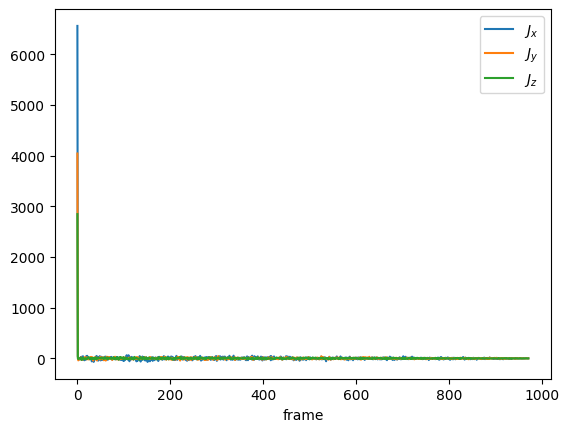

In [30]:
mean_acf.plot(x='frame',y=['$J_{x}$','$J_{y}$','$J_{z}$'])